## How my Journey As a DataScientist Started, All Thanks To DataScience Nigeria

This notebook contains my major learning From a Supermarket sales prediction Kaggle Competition, It was organised by
DataScience Nigeria, a prequalification competition to attend their yearly bootcamp


The target for this competition is predicting the supermarket sales of Chukwudi supermarket Giving all its available features.
Below are my codes:

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#importing the dataset
train = pd.read_csv('c:/data2/all/train.csv')
test = pd.read_csv('c:/data2/all/test.csv')
train[:6]
train.describe()
train.head()


,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket_Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


### Data Cleaning And Preprocessing

In this section, we aim to check if the data provided doesnot contain missing values and other noise that might affect 
our modelling.

The output depicts that two features in the training and test set contains missing values, and the features include:
Product weight 
Supermarket size

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
Product_Identifier                4990 non-null object
Supermarket_Identifier            4990 non-null object
Product_Supermarket_Identifier    4990 non-null object
Product_Weight                    4188 non-null float64
Product_Fat_Content               4990 non-null object
Product_Shelf_Visibility          4990 non-null float64
Product_Type                      4990 non-null object
Product_Price                     4990 non-null float64
Supermarket_Opening_Year          4990 non-null int64
Supermarket_Size                  3540 non-null object
Supermarket_Location_Type         4990 non-null object
Supermarket_Type                  4990 non-null object
Product_Supermarket_Sales         4990 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 12 columns):
Product_Identifier                3532 non-null object
Supermarket_Identifier            3532 non-null object
Product_Supermarket_Identifier    3532 non-null object
Product_Weight                    2871 non-null float64
Product_Fat_Content               3532 non-null object
Product_Shelf_Visibility          3532 non-null float64
Product_Type                      3532 non-null object
Product_Price                     3532 non-null float64
Supermarket_Opening_Year          3532 non-null int64
Supermarket_Size                  2573 non-null object
Supermarket_Location_Type         3532 non-null object
Supermarket_Type                  3532 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 331.2+ KB


#### Sorting Out Problem With Missing Values

Note: This can be done using several method
On this work missing values for the numeric feature(product weight), are filled using the mean, while 
for the categorical feature(Supermarket size), missing values are filled with the mode

In [5]:
train['Product_Weight'].fillna(train['Product_Weight'].mean(), inplace=True)
train['Supermarket_Size'].fillna(train['Supermarket_Size'].mode()[0], inplace=True)
(train.isnull()).sum()

Product_Identifier                0
Supermarket_Identifier            0
Product_Supermarket_Identifier    0
Product_Weight                    0
Product_Fat_Content               0
Product_Shelf_Visibility          0
Product_Type                      0
Product_Price                     0
Supermarket_Opening_Year          0
Supermarket_Size                  0
Supermarket_Location_Type         0
Supermarket_Type                  0
Product_Supermarket_Sales         0
dtype: int64

In [6]:
test['Product_Weight'].fillna(test['Product_Weight'].mean(), inplace=True)
test['Supermarket_Size'].fillna(test['Supermarket_Size'].mode()[0], inplace=True)
(test.isnull()).sum()

Product_Identifier                0
Supermarket_Identifier            0
Product_Supermarket_Identifier    0
Product_Weight                    0
Product_Fat_Content               0
Product_Shelf_Visibility          0
Product_Type                      0
Product_Price                     0
Supermarket_Opening_Year          0
Supermarket_Size                  0
Supermarket_Location_Type         0
Supermarket_Type                  0
dtype: int64

# EXPLANATORY DATA ANALYSIS

Before modelling, time has to be taken to understand the Data given, in order to get insights with depth for modelling 
and descriptive analysis

In [7]:
m = train.describe()
m

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales
count,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.308671,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,9.300000,0.027273,307.890000,1994.000000,2757.660000
50%,12.908838,0.053564,393.860000,2006.000000,5374.675000
75%,16.250000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


#### EDA ON THE MUMERIC FEATURES

<b>NOTE: All unique product(Product_Supermarket_Identifier) under considerations opt out from 10 supermarkets as obtain from
the table above</b>

The above tables gives a summary analysis of what the supermarket dataset looks like.

Table 1 gives a summary statistic of the numeric features, while Table 2 gives the summary statistic of the categorical variables

<b>Table 1 contains:</b>

  1. Total Counts, mean value, standard deviation value, minimum value, 25% - 50% - 75% value, Maximum Value of The Numeric features


<b>Table 2 contains:</b>

   2. Total Counts, Number of unique Values in each categories, the top appearing unique value in each categories, and its frequencies


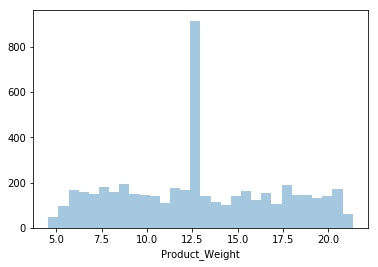

In [8]:
sns.distplot(train['Product_Weight'], kde= False,  bins = 30)

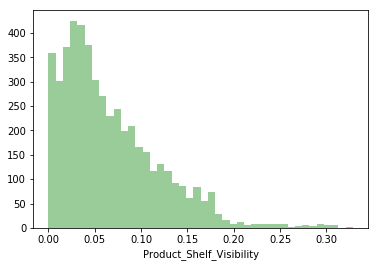

In [9]:
sns.distplot(train['Product_Shelf_Visibility'], kde= False, color = 'green')

From the Data one of the numeric feature given is product weight, exploring the weight of products sold  across the 10 supermarket,
it appears that products with weight = 12.5kg appears to be prominent with over 800 counts


Also from the Dataset, exploring product shelf Visibility across the 10 supermarkets in consideration,it appears that products shelf visibility has its shelf visibility values clustered more around 0.0 to 0.10


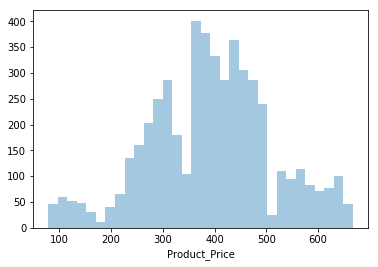

In [10]:
sns.distplot(train['Product_Price'], kde= False)

[2005 1994 2014 2016 2011 2009 1992 2006 2004]


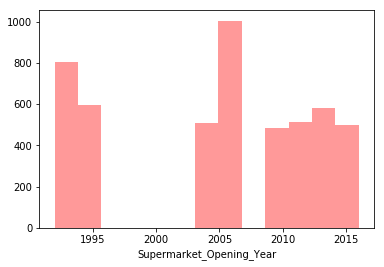

In [11]:
print(train.Supermarket_Opening_Year.unique())
sns.distplot(train.Supermarket_Opening_Year, kde= False, color= 'red')

Checking through the output of the above distribution plot of supermarket opening year, we notice that 2006 
appears to be the year with dominance followed by 1994, while the rest seems to be evenly distributed based on the dataset accesed.

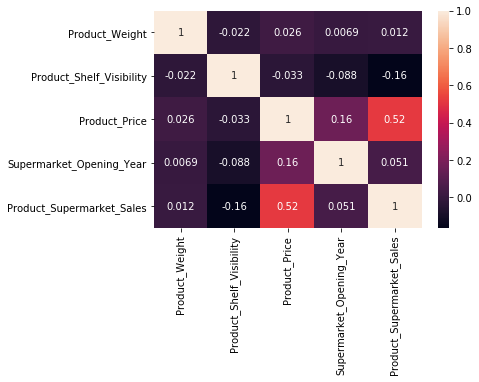

In [12]:
corr = train.corr()
sns.heatmap(corr, annot = True)

The above correlation matrix explains the existing correlations between the numeric features in the Dataset,giving the annotation
values displayed on every of the squares on the heatmap

Giving the annotation values displayed, we notice that there appears to be:
1. weak negative correlation between Product weight and product shelf visibility (-0,022)
2. weak positive correlation between product weight and product price (0.026)
3. weak positive correlation between Product weight and Supermarket Opening year (0.0069)
4. weak positive correlation between Product weight and Product Supermarket sales (0.012)

This explains the first row of the heatmap, and can also be used in explaining other rows.

#### EDA ON THE CATEGORICAL FEATURES

In [13]:
train.describe(include = 'O')

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Fat_Content,Product_Type,Supermarket_Size,Supermarket_Location_Type,Supermarket_Type
count,4990,4990,4990,4990,4990,4990,4990,4990
unique,1451,10,4990,3,16,3,3,4
top,NCL31,CHUKWUDI049,NCL31_CHUKWUDI049,Low Fat,Snack Foods,Medium,Cluster 3,Supermarket Type1
freq,9,620,1,3039,758,3032,1940,3304


['CHUKWUDI010' 'CHUKWUDI013' 'CHUKWUDI017' 'CHUKWUDI018' 'CHUKWUDI035'
 'CHUKWUDI045' 'CHUKWUDI019' 'CHUKWUDI027' 'CHUKWUDI049' 'CHUKWUDI046']


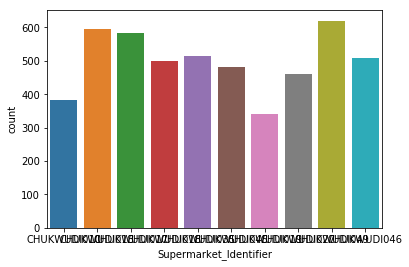

In [14]:
print( train.Supermarket_Identifier.unique())
sns.countplot(x = train.Supermarket_Identifier,)

The above count plot displays the counts of all the 10 supermarkets containing all products sold out.

And it appears that sampling bais might be considered here, because product considered from each supermarkets are not evenly 
distributed. ......(feature could be droped to avoid overfitting)

['Low Fat' 'Ultra Low fat' 'Normal Fat']


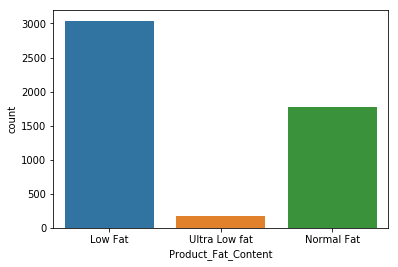

In [15]:
print( train.Product_Fat_Content.unique())
sns.countplot(train.Product_Fat_Content)

['Medium' 'High' 'Small']


(<matplotlib.axes._subplots.AxesSubplot at 0xb78bc50>,)

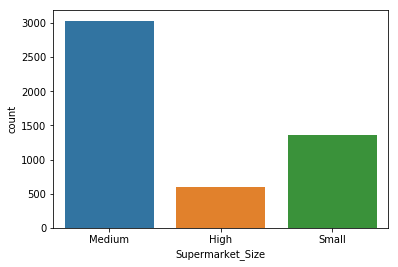

In [16]:
print( train.Supermarket_Size.unique())
sns.countplot(train.Supermarket_Size),

['Grocery Store' 'Supermarket Type1' 'Supermarket Type2'
 'Supermarket Type3']


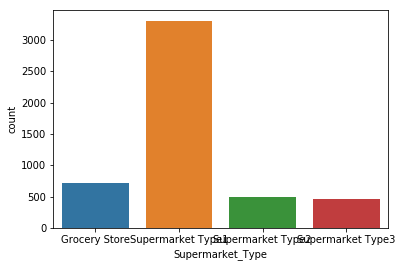

In [17]:
print( train.Supermarket_Type.unique())
sns.countplot(train.Supermarket_Type)

['Cluster 3' 'Cluster 2' 'Cluster 1']


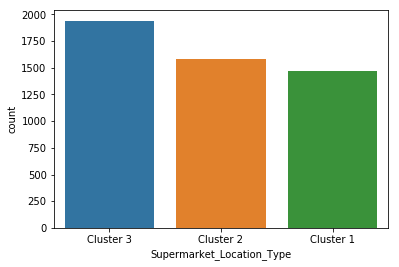

In [18]:
print( train.Supermarket_Location_Type.unique())
sns.countplot(train.Supermarket_Location_Type)

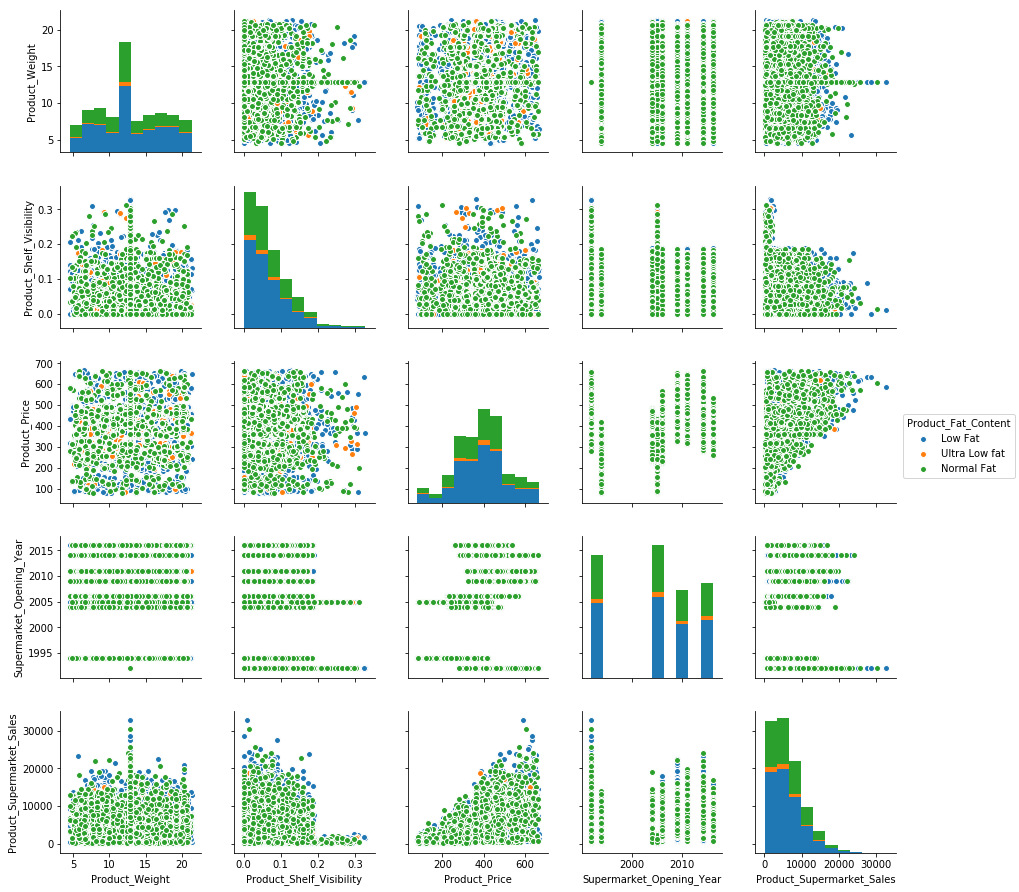

In [19]:
sns.pairplot(train, hue='Product_Fat_Content')

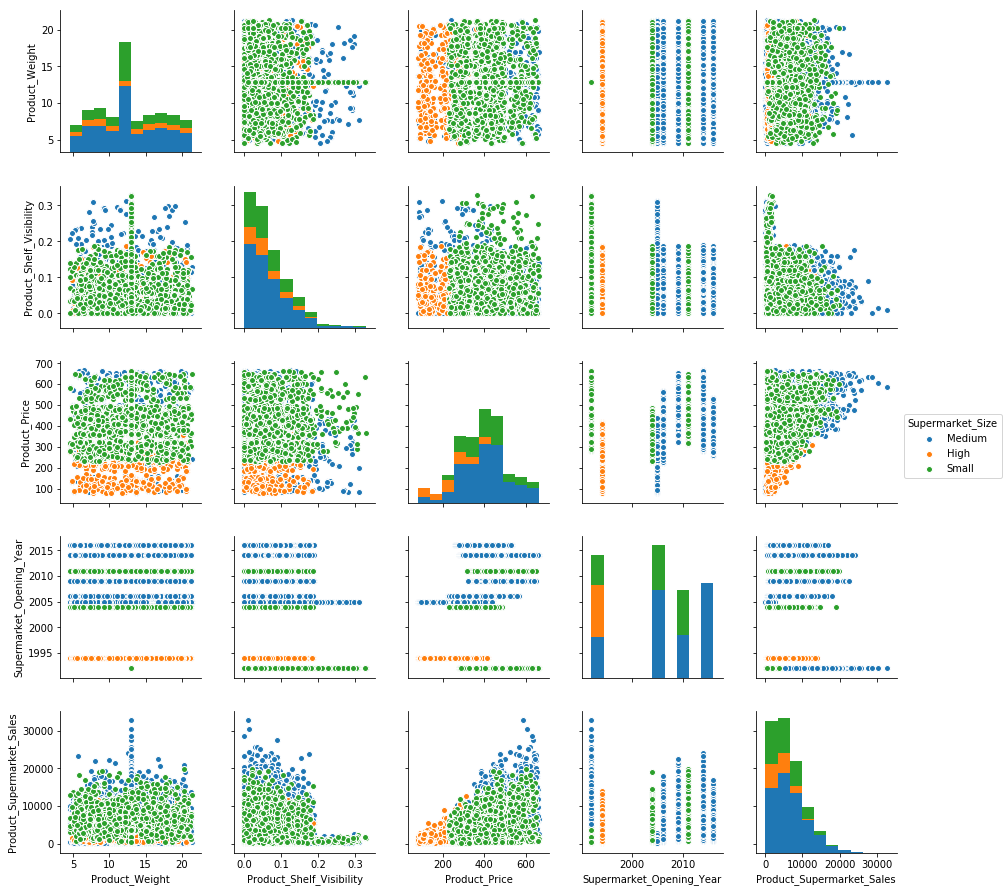

In [20]:
sns.pairplot(train, hue='Supermarket_Size')

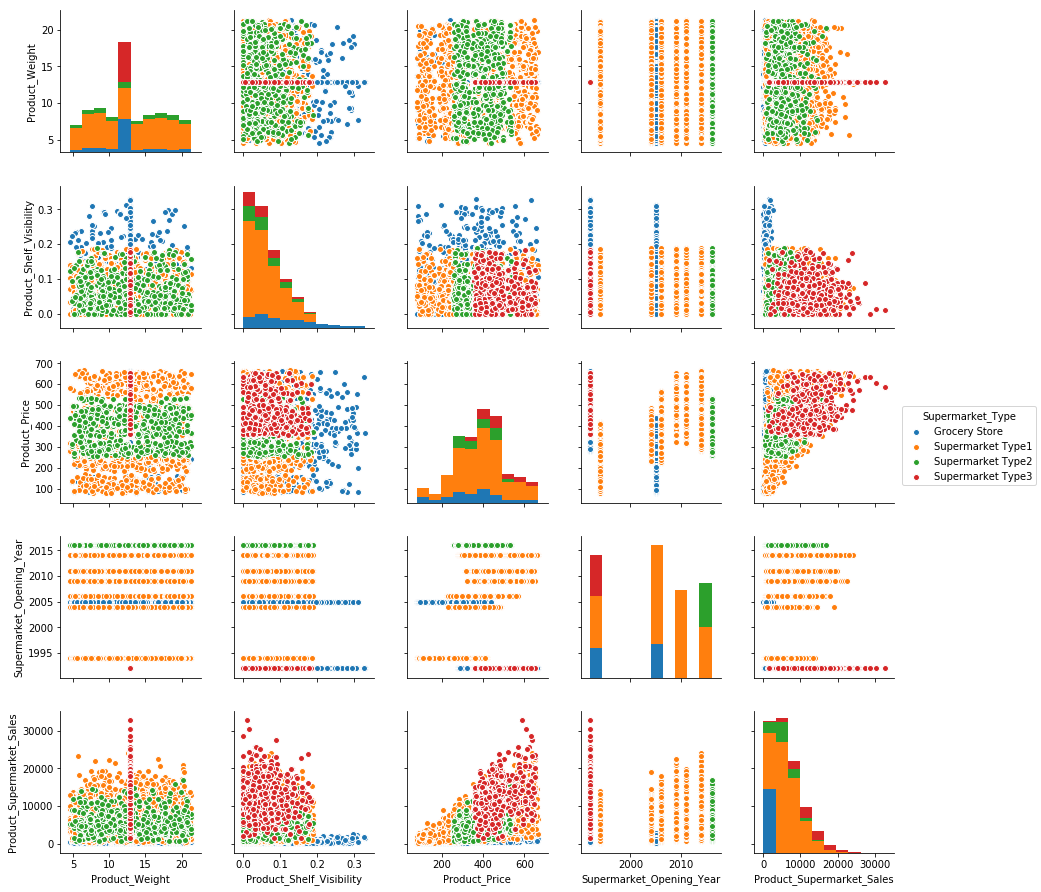

In [21]:
sns.pairplot(train, hue='Supermarket_Type')

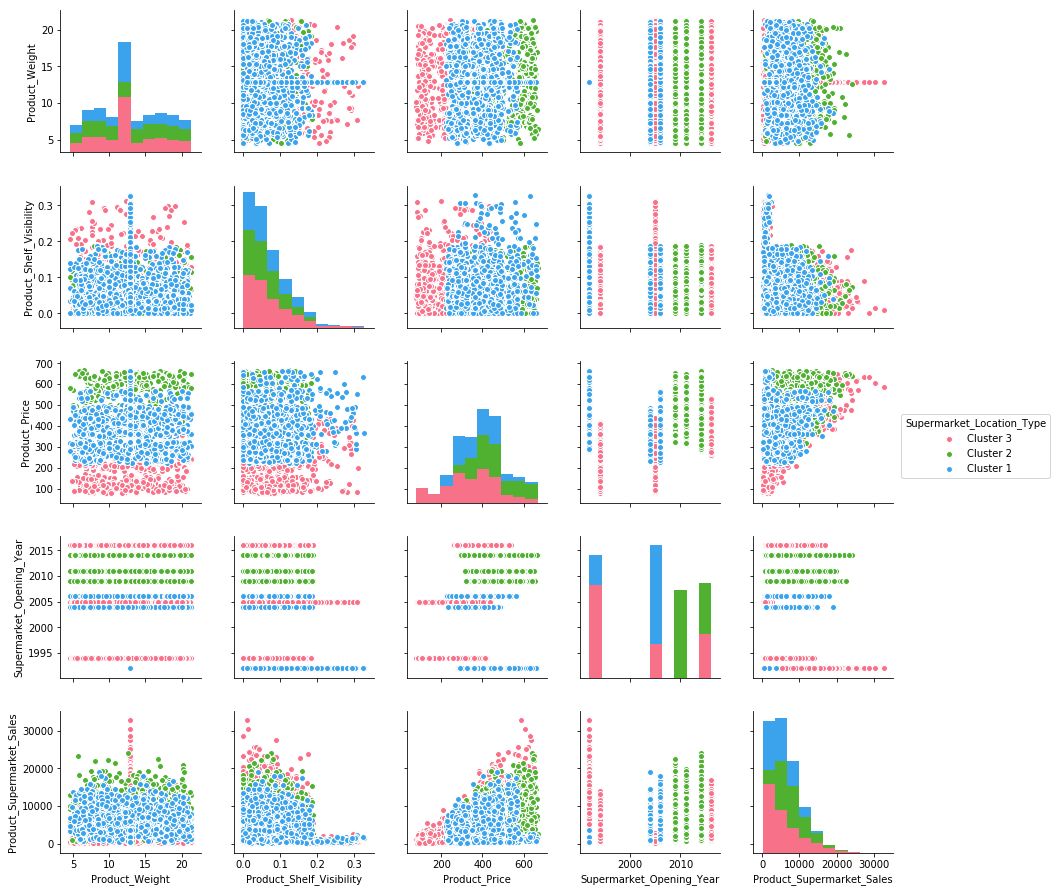

In [22]:
sns.pairplot(train, hue='Supermarket_Location_Type', palette="husl")

The pairplot output is an interesting plot, which explains in details what the Dataset entails

Explaining little insight gotten from the last plot:
    
Considering Product Price, you can see that cluster 1 supermarket location type has it product price clustered around 250 to 500,
while other clusters dominates the rest count as shown by the plot.

and many more to talk about....(you also can do well do get more insights from the plot, in order to save time.)

# Modelling

In [23]:
#this is for training set
type_dummies = pd.get_dummies(train.Supermarket_Type, prefix='Supermarket_')
location_dummies = pd.get_dummies(train.Supermarket_Location_Type, prefix='Supermarket_Location_')
fatcontent_dummies = pd.get_dummies(train.Product_Fat_Content,prefix='Product_fat_' )
size_dummies = pd.get_dummies(train.Supermarket_Size, prefix='Supermarket_')
producttype_dummies = pd.get_dummies(train.Product_Type, prefix='Product_')

In [25]:
#training
data = pd.concat([train, type_dummies], axis=1)
data.head()
dat1 = pd.concat([data,size_dummies],axis=1)
dat2 = pd.concat([dat1, fatcontent_dummies], axis = 1)
dat3 = pd.concat([dat2,location_dummies],axis =1)
realdata = pd.concat([dat3,producttype_dummies], axis =1)
print(realdata.columns)

Index(['Product_Identifier', 'Supermarket_Identifier',
       'Product_Supermarket_Identifier', 'Product_Weight',
       'Product_Fat_Content', 'Product_Shelf_Visibility', 'Product_Type',
       'Product_Price', 'Supermarket_Opening_Year', 'Supermarket_Size',
       'Supermarket_Location_Type', 'Supermarket_Type',
       'Product_Supermarket_Sales', 'Supermarket__Grocery Store',
       'Supermarket__Supermarket Type1', 'Supermarket__Supermarket Type2',
       'Supermarket__Supermarket Type3', 'Supermarket__High',
       'Supermarket__Medium', 'Supermarket__Small', 'Product_fat__Low Fat',
       'Product_fat__Normal Fat', 'Product_fat__Ultra Low fat',
       'Supermarket_Location__Cluster 1', 'Supermarket_Location__Cluster 2',
       'Supermarket_Location__Cluster 3', 'Product__Baking Goods',
       'Product__Breads', 'Product__Breakfast', 'Product__Canned',
       'Product__Dairy', 'Product__Frozen Foods',
       'Product__Fruits and Vegetables', 'Product__Hard Drinks',
       'Product

In [26]:
feature_cols = ['Product_Weight','Product_Price','Supermarket__Grocery Store','Supermarket__Supermarket Type3','Supermarket__Supermarket Type1','Supermarket__High','Supermarket__Medium',]
x = realdata[feature_cols].fillna(0)
y = realdata.iloc[:, 12]

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge 
lm = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=5)

In [28]:
import math
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Conducting Ridge Regression

In [29]:
ridge = Ridge(alpha=0.01).fit(x_train, y_train)
ridge.score(x_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(x_train, y_train)))
print("Training set score: {:.2f}".format(ridge.score(x_test, y_test)))

Training set score: 0.54
Training set score: 0.57


# Conducting a polynomial Ridge Regression

In [30]:
steps = [
    ('scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree = 2)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]

pipeline = Pipeline(steps)
pipeline.fit(x_train,y_train)

print('Training score:{}'.format(pipeline.score(x_train,y_train)))
print('Test score:{}'.format(pipeline.score(x_test,y_test)))

Training score:0.5641660393260337
Test score:0.5895469151201276


In [32]:
import math as mth
from sklearn.metrics import mean_absolute_error
y_pred = pipeline.predict(x_test)
rm2 = (mean_absolute_error(y_test,y_pred))
rm2

2130.5635046965945

# Conducting a Linear Regression

In [33]:
lm.fit(x_train,y_train)
pred_train = lm.predict(x_train)
pred_test = lm.predict(x_test)
print("Training set score: {:.2f}".format(lm.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lm.score(x_test,y_test)))

Training set score: 0.54
Test set score: 0.57


# Conducting XGBoost Regression

In [34]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [35]:
print("Training set score: {:.2f}".format(xgb.score(x_train, y_train)))
print("Test set score: {:.2f}".format(xgb.score(x_test,y_test)))

Training set score: 0.61
Test set score: 0.58


# Evaluation on The Test Set

In [36]:
type_dummies1 = pd.get_dummies(test.Supermarket_Type, prefix='Supermarket_')
location_dummies1 = pd.get_dummies(test.Supermarket_Location_Type, prefix='Supermarket_Location_')
fatcontent_dummies1 = pd.get_dummies(test.Product_Fat_Content,prefix='Product_fat_' )
size_dummies1 = pd.get_dummies(test.Supermarket_Size, prefix='Supermarket_')
producttype_dummies1 = pd.get_dummies(test.Product_Type, prefix='Product_')

In [37]:
datatest = pd.concat([test, type_dummies1], axis=1)
data.head()
dat1test = pd.concat([datatest,size_dummies1],axis=1)
dat2test = pd.concat([dat1test, fatcontent_dummies1], axis = 1)
dat3test = pd.concat([dat2test,location_dummies1],axis =1)
realdatatest = pd.concat([dat3test,producttype_dummies1], axis =1)
print(realdatatest.columns)

Index(['Product_Identifier', 'Supermarket_Identifier',
       'Product_Supermarket_Identifier', 'Product_Weight',
       'Product_Fat_Content', 'Product_Shelf_Visibility', 'Product_Type',
       'Product_Price', 'Supermarket_Opening_Year', 'Supermarket_Size',
       'Supermarket_Location_Type', 'Supermarket_Type',
       'Supermarket__Grocery Store', 'Supermarket__Supermarket Type1',
       'Supermarket__Supermarket Type2', 'Supermarket__Supermarket Type3',
       'Supermarket__High', 'Supermarket__Medium', 'Supermarket__Small',
       'Product_fat__Low Fat', 'Product_fat__Normal Fat',
       'Product_fat__Ultra Low fat', 'Supermarket_Location__Cluster 1',
       'Supermarket_Location__Cluster 2', 'Supermarket_Location__Cluster 3',
       'Product__Baking Goods', 'Product__Breads', 'Product__Breakfast',
       'Product__Canned', 'Product__Dairy', 'Product__Frozen Foods',
       'Product__Fruits and Vegetables', 'Product__Hard Drinks',
       'Product__Health and Hygiene', 'Product__Hou

In [38]:
feature_cols = ['Product_Weight','Product_Price','Supermarket__Grocery Store','Supermarket__Supermarket Type3','Supermarket__Supermarket Type1', 'Supermarket__High','Supermarket__Medium',]
x1 = realdatatest[feature_cols].fillna(0)


In [39]:
pol_pred = pipeline.predict(x1)
pol_preds = pd.DataFrame(pol_pred)
pol_preds[:4]
#writer = pd.ExcelWriter('output6.xlsx')
#pol_preds.to_excel(writer,'product_sales')
#writer.save()

,0
0,1114.634585
1,7481.013548
2,7648.913460
3,1059.793901
